## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [10]:
"""
# 載入 Callbacks, 並將 monitor 設定為監控 validation loss
"""
from keras.callbacks import EarlyStopping
results = {}

for patience in [5, 10, 25]:
    earlystop = EarlyStopping(monitor="val_loss", 
                              patience=patience, 
                              verbose=1)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "ES_"+ str(patience)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 3s 61us/step - loss: 1.1819 - acc: 0.5922 - val_loss: 1.4731 - val_acc: 0.4839
Epoch 16/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.1586 - acc: 0.6013 - val_loss: 1.4559 - val_acc: 0.4877
Epoch 17/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.1362 - acc: 0.6109 - val_loss: 1.4530 - val_acc: 0.4930
Epoch 18/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.1107 - acc: 0.6198 - val_loss: 1.4602 - val_acc: 0.4883
Epoch 19/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.0898 - acc: 0.6289 - val_loss: 1.4634 - val_acc: 0.4903
Epoch 20/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.0674 - acc: 0.6373 - val_loss: 1.4657 - val_acc: 0.4903
Epoch 21/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.0460 - acc: 0.6448 - val_loss: 1.4605 - val_acc: 0.4925
Epoch 22/50
50000/50000 [=====================

Epoch 37/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.7267 - acc: 0.7683 - val_loss: 1.5241 - val_acc: 0.4914
Epoch 38/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.7095 - acc: 0.7747 - val_loss: 1.5394 - val_acc: 0.4937
Epoch 39/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.6878 - acc: 0.7848 - val_loss: 1.5345 - val_acc: 0.4923
Epoch 40/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.6739 - acc: 0.7897 - val_loss: 1.5390 - val_acc: 0.4998
Epoch 41/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.6515 - acc: 0.7988 - val_loss: 1.5586 - val_acc: 0.4943
Epoch 42/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.6359 - acc: 0.8050 - val_loss: 1.5809 - val_acc: 0.4927
Epoch 43/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.6184 - acc: 0.8108 - val_loss: 1.5735 - val_acc: 0.4955
Epoch 00043: early stopping


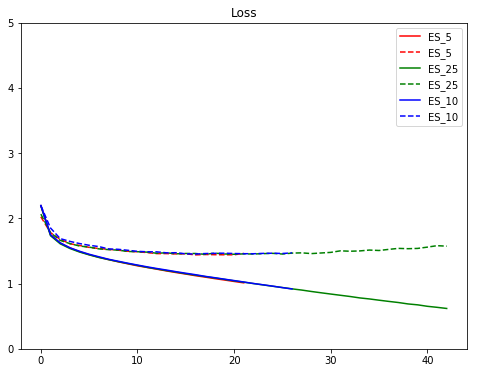

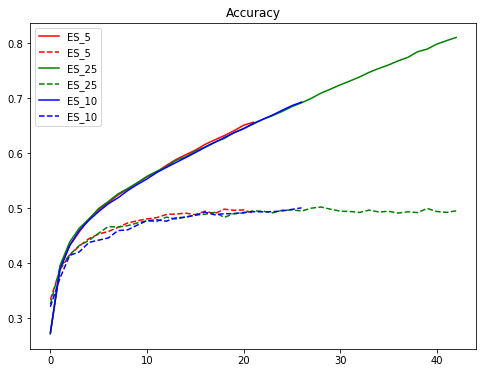

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()